# Business Background

## Background Business Problem

Indonesian investment platform startup currently focused on app-based mutual fund investment products. The marketing and sales team would like to run a thematic communication campaign for the upcoming product but want to tailor the campaign to a few different relevant segments. Data analyst is tasked to provide segmentation for this purpose and give recommendations for the themes of the campaign.

## **Problem statement**

How can we provide customer segmentation and give communication recommendations for the themes of the campaign in the second week of October 2021.

## **Objective**

To provide customer segmentation for government bond and give communication recommendations for the themes of the campaign in the second week of October 2021.

# Data Preparations

## Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

## Import Dataset

In [ ]:
# IMPORT DATA 1 (User Data)
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_tf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(sheet_url_tf)


# IMPORT DATA 2 (Daily Trans User Data)
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_tf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df2 = pd.read_csv(sheet_url_tf)


dummy_df1 = df1.copy()
dummy_df2 = df2.copy()

## Rename Column for easy use

In [ ]:
# Change registration_import_datetime to date_register
# Change end_of_month_invested_amount to end_month_amount

dummy_df1.rename(columns={'registration_import_datetime':'date_register'}, inplace=True)
dummy_df1.rename(columns={'end_of_month_invested_amount':'end_month_amount'}, inplace=True)

# Data Cleaning

## User

### Check Data Type

In [ ]:
## Check Data type

dummy_df1.info()

# Checking all data type to choose which one we should change to it's correct type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  int64 
 1   date_register       14712 non-null  object
 2   user_gender         14712 non-null  object
 3   user_age            14712 non-null  int64 
 4   user_occupation     14712 non-null  object
 5   user_income_range   14712 non-null  object
 6   referral_code_used  5604 non-null   object
 7   user_income_source  14712 non-null  object
 8   end_month_amount    14712 non-null  int64 
 9   total_buy_amount    14712 non-null  int64 
 10  total_sell_amount   14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


### Change Data Type

In [ ]:
# change data type of "date_register" to datetime64 data 1
# and change data type of "user_id" to str

dummy_df1['date_register'] = pd.to_datetime(dummy_df1['date_register'])
dummy_df1['user_id'] = dummy_df1['user_id'].astype(str)

### Check for values and typo

In [ ]:
### Checking Typos

dummy_df1['user_gender'].unique()
dummy_df1['user_occupation'].unique()
dummy_df1['user_income_range'].unique()
dummy_df1['referral_code_used'].unique()
dummy_df1['user_income_source'].unique()

# No typos found !

array(['Gaji', 'Keuntungan Bisnis', 'Lainnya', 'Dari Orang Tua / Anak',
       'Undian', 'Tabungan', 'Warisan', 'Hasil Investasi',
       'Dari Suami / istri', 'Bunga Simpanan'], dtype=object)

### Handling Missing Values

In [ ]:
### Handling Missing Value
dummy_df1['referral_code_used']= dummy_df1['referral_code_used'].fillna(value = 'not using referral')
dummy_df1['referral_code_used']

# Fill NA Values with 'Not using referral'

0        not using referral
1        not using referral
2        not using referral
3        not using referral
4             used referral
                ...        
14707    not using referral
14708    not using referral
14709    not using referral
14710    not using referral
14711         used referral
Name: referral_code_used, Length: 14712, dtype: object

### Checking Duplicate

In [ ]:
### Check duplicate

dummy_df1[dummy_df1.duplicated()]

# No duplicate found!

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_month_amount,total_buy_amount,total_sell_amount


### User Clean Data

In [ ]:
# Copying the clean user dataset into a new dataframe called "user_clean"

user_clean = dummy_df1.copy()
user_clean.head(10)

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_month_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not using referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,not using referral,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,not using referral,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,not using referral,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,not using referral,Gaji,999000,149000,0
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,not using referral,Keuntungan Bisnis,0,0,0
7,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0
8,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,not using referral,Gaji,110431,1000000,-1889569
9,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,not using referral,Keuntungan Bisnis,500000,0,0


## Transactions User

### Check Data Type

In [ ]:
dummy_df2.info()

# Checking all data type to choose which one we should change to it's correct type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

### Change Data Type

In [ ]:
# change data type of "date" to datetime64 data 1
# and change data type of "user_id" to str

dummy_df2['date'] = pd.to_datetime(dummy_df2['date'])
dummy_df2['user_id'] = dummy_df2['user_id'].astype(str)

### Check for values and typos

### Data Manipulation

In [ ]:
zero_null =[
    'buy_saham_transaction_amount',            
    'sell_saham_transaction_amount',          
    'buy_pasar_uang_transaction_amount',       
    'sell_pasar_uang_transaction_amount',      
    'buy_pendapatan_tetap_transaction_amount', 
    'sell_pendapatan_tetap_transaction_amount',
    'buy_campuran_transaction_amount',         
    'sell_campuran_transaction_amount',       
    'total_buy_transaction_amount',            
    'total_sell_transaction_amount'] 

dummy_df2[zero_null] = dummy_df2[zero_null].replace(0, np.nan)
dummy_df2

## Replacing 0 value to Null value, because zero value can affect the result of mean/average of the data for descriptive analysis below

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000,000.00",10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000,000.00",10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000,000.00",10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000,000.00",10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000,000.00",10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0
158807,4165132,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000.00",NaN,NaN,10000
158808,4165630,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40,000.00","10,000.00","50,000.00",NaN,100000
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000.00",NaN,10000


### Handling Missing Values

In [ ]:
## All missing values in trasaction data would be ignored to prevent the error of calculation analysis

### Checking Duplicate

In [ ]:
duplicate = dummy_df2['user_id'].duplicated()
duplicate

# There's duplicate in user_id because of it's daily transaction log data, and it make iterations for each day
# Duplicated user_id won't be removed because of this reason

0         False
1          True
2          True
3          True
4          True
          ...  
158806    False
158807    False
158808    False
158809    False
158810    False
Name: user_id, Length: 158811, dtype: bool

### Clean Transaction User Data

In [ ]:
#changing the clean transaction dataset into a new dataframe called "trans_clean"

trans_clean = dummy_df2.copy()
trans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              3471 non-null    float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         4426 non-null    float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   4086 non-null    float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           131 non-null     float64       
 9   sell_campuran_t

# Merge Dataset

In [ ]:
drop_df = trans_clean.copy()
drop_df = drop_df.drop(['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount'],axis=1, inplace=False)
drop_df.info()

# The reason of dropping that column because it would be overlapping and it has the same value with "end_month_invested_amount" which i renamed it to "end_month amount"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              3471 non-null    float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         4426 non-null    float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   4086 non-null    float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           131 non-null     float64       
 9   sell_campuran_t

In [ ]:
summary = drop_df.groupby('user_id').sum()[zero_null]
summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8277 entries, 1004326 to 997938
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   buy_saham_transaction_amount              8277 non-null   float64
 1   sell_saham_transaction_amount             8277 non-null   float64
 2   buy_pasar_uang_transaction_amount         8277 non-null   float64
 3   sell_pasar_uang_transaction_amount        8277 non-null   float64
 4   buy_pendapatan_tetap_transaction_amount   8277 non-null   float64
 5   sell_pendapatan_tetap_transaction_amount  8277 non-null   float64
 6   buy_campuran_transaction_amount           8277 non-null   float64
 7   sell_campuran_transaction_amount          8277 non-null   float64
 8   total_buy_transaction_amount              8277 non-null   float64
 9   total_sell_transaction_amount             8277 non-null   float64
dtypes: float64(10)
memory usage: 711.

In [ ]:
df_merged = user_clean.merge(summary,how='left',left_on='user_id', right_on='user_id')
df_active = user_clean.merge(summary,how='inner',left_on='user_id', right_on='user_id')

# Making 2 new Dataframe for :
# 1.df_merged for overall analysis
# 2.df_active for defining all active transaction users

# Checking Outliers

In [ ]:
# Checking Outliers in User Age column

df_merged['user_age'].skew()

# user_age has postive skewness
# use IQR to detect outlier

1.5205836383808127

<AxesSubplot:>

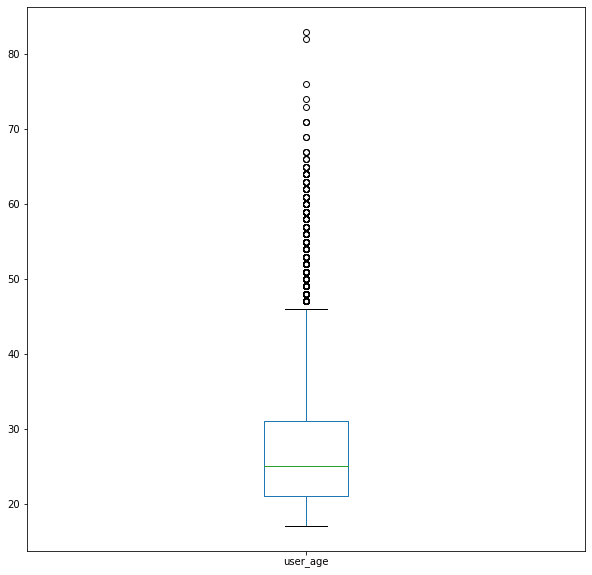

In [ ]:
df_merged.boxplot(column=['user_age'],fontsize=10, rot=0,grid=False,figsize=(10,10),vert=True)

In [ ]:
# Calculate quantile 1 and 3
Q1 = df_merged['user_age'].quantile(0.25)
Q3 = df_merged['user_age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 21.0

Q3:
 31.0

IQR:
 10.0

Min:
 6.0

Max:
 46.0


In [ ]:
# Count outliers in user_age

def find_outliers_IQR(df_merged):

   q1=df_merged.quantile(0.25)

   q3=df_merged.quantile(0.75)

   IQR=q3-q1

   outliers = df_merged[((df_merged<(q1-1.5*IQR)) | (df_merged>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df_merged['user_age'])

print('Number of outliers in user_age column: '+ str(len(outliers)))

print('Ratio Outliers to total data: '+ str(len(outliers)/df_merged['user_age'].count()))

# There is some of outlier around 652 data
# with ratio 4% compared to total data
# I did not remove the outliers because:
# 1. They are part of natural data (old investors)
# 2. They could generate interesting insights

Number of outliers in user_age column: 652
Ratio Outliers to total data: 0.044317563893420335


# Exploratory Data Analysis

## Descriptive Analysis

### User 

In [ ]:
data =['user_id',                                       
'date_register',                            
'user_gender',                                     
'user_age',                                         
'user_occupation',                                 
'user_income_range',                                
'referral_code_used',                               
'user_income_source',                               
'end_month_amount',                               
'total_buy_amount',              
'total_sell_amount',       
] 

analysis = df_merged[data].describe()
analysis

,user_age,end_month_amount,total_buy_amount,total_sell_amount
count,"14,712.00","14,712.00","14,712.00","14,712.00"
mean,27.18,"1,445,996.23","842,752.13","-164,862.89"
std,8.55,"19,073,876.65","12,897,431.97","2,716,128.69"
min,17.00,0.00,0.00,"-185,000,000.00"
25%,21.00,0.00,0.00,0.00
50%,25.00,0.00,0.00,0.00
75%,31.00,"125,000.00",0.00,0.00
max,83.00,"1,012,200,000.00","799,500,000.00",0.00




*   Total user registered is 14.712 users
*   Age of user is around 17 - 83 tahun
*   The highest amount in the end of month (September) is 1,012,200,000 Billion
*  The highest amount of total buy is 799,500,000 and 185.000.000 for total sell amount



### Transactions User

In [ ]:
data2 =[
    'buy_saham_transaction_amount',            
    'sell_saham_transaction_amount',          
    'buy_pasar_uang_transaction_amount',       
    'sell_pasar_uang_transaction_amount',      
    'buy_pendapatan_tetap_transaction_amount', 
    'sell_pendapatan_tetap_transaction_amount',
    'buy_campuran_transaction_amount',         
    'sell_campuran_transaction_amount',       
    'total_buy_transaction_amount',            
    'total_sell_transaction_amount'        
    ]

analysis2 = df_active[data2].describe()
analysis2

,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount
count,"8,277.00","8,277.00","8,277.00","8,277.00","8,277.00","8,277.00","8,277.00","8,277.00","8,277.00","8,277.00"
mean,"192,140.47","-55,711.25","450,119.46","-122,795.70","791,489.30","-93,063.02","64,205.27","-21,466.48","1,497,954.50","-293,036.46"
std,"1,511,259.52","402,838.42","6,890,289.42","2,751,943.95","14,975,618.71","1,712,266.49","1,253,214.30","728,564.88","17,166,906.44","3,616,082.14"
min,0.00,"-12,346,799.00",0.00,"-185,000,000.00",0.00,"-92,712,405.00",0.00,"-50,000,000.00",0.00,"-185,000,000.00"
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-10,000.00"
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,"10,000.00",0.00,"25,000.00",0.00,0.00,0.00,"150,000.00",0.00
max,"55,870,000.00",0.00,"433,800,000.00",0.00,"799,500,000.00",0.00,"51,000,000.00",0.00,"799,500,000.00",0.00




*   There are 8.277 users that still active in transaction in our platform
*   The highest amount of buy transactions is Pendapatan tetap product with 799,500,000.00 rupiah, meanwhile Campuran product has the lowest amount of buy transaction compared to others with 51,000,000.00 rupiah.

* The highest amount of sell transaction is Pasar Uang product with total 185,000,000.00 rupiah.



## User Analysis

### User Registered

In [ ]:
# 1ST EDA (Total User Registered)
df_merged['user_id'].count()



14712



*   There is 14.712 user registered in our platform from August till September




### User Active & Non-Active

In [ ]:
df_merged['user_id'].value_counts()

# There is 8.277 users that still active doing transaction (buy/sell) in our platform
# There is 6.435 user that still did'nt do transaction

162882     1
4297940    1
4267551    1
4407058    1
4270595    1
          ..
3771510    1
3847659    1
3763751    1
3878306    1
4401986    1
Name: user_id, Length: 14712, dtype: int64

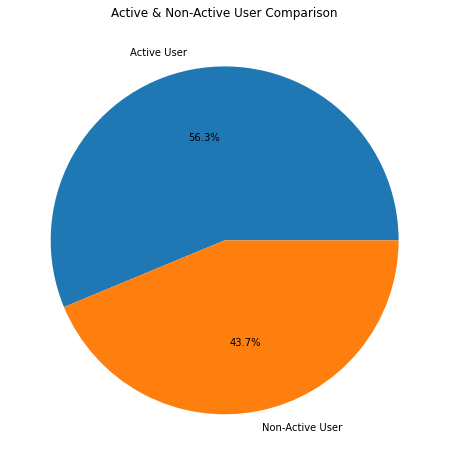

In [ ]:
x = ['Active User', 'Non-Active User']
y = [8277, 6435]

# Create pie chart
plt.figure(figsize=(10,8))
plt.pie(y, labels=x, autopct='%1.1f%%')

# Add title
plt.title('Active & Non-Active User Comparison')
plt.show()

*   There is 8.277 (56.3%) users that still active doing transaction (buy/sell) in our platform

*   There is 6.435 (43.7%) user that didn't do any transaction

* Active or Non-active user are defined base on their last trasanction. 

* User Active is user that still doing transaction(s) in our platform

* User Non-Active is user that didn't do any transaction(s)

### User Gender Comparison

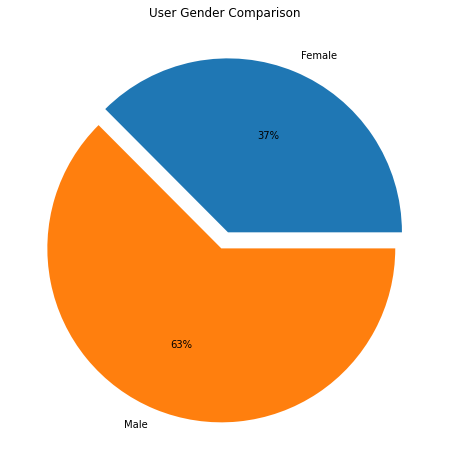

In [ ]:
# 2ND EDA (Comparison on Gender)
gender = df_active.groupby('user_gender')['user_id'].count()
gender = gender.reset_index()
gender

# Male 8977 (61%)
# Female 5735 (39%)

plt.figure(figsize=(10,8))
plt.pie(gender['user_id'], labels = gender['user_gender'], explode=(0.05,0.05), autopct='%1.0f%%')
plt.title('User Gender Comparison')
plt.show()

In [ ]:
gender.value_counts()

user_gender  user_id
Female       3101       1
Male         5176       1
dtype: int64

* Total Male user is 8977 (61%)
* Total Female user is 5735 (39%)
* Male user dominated female user in case of total user

### User Age

In [ ]:
# 3RD EDA User Ages
# Making a category for some range of age users

a = df_active['user_age']

df_active.loc[(a >= 17) & (a <=30) , 'age_category'] = 'Young Adult'
df_active.loc[(a > 30) & (a <=45), 'age_category'] = 'Middle Age Adult'
df_active.loc[(a > 45) & (a <= 60), 'age_category'] = 'Adult'
df_active.loc[(a > 60) , 'age_category'] = 'Old'

df_active['age_category'].value_counts()

Young Adult         6175
Middle Age Adult    1680
Adult                394
Old                   28
Name: age_category, dtype: int64

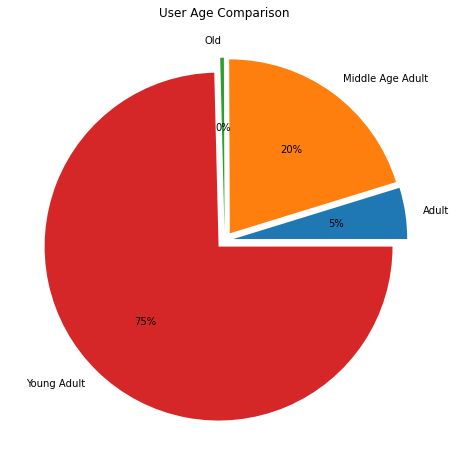

In [ ]:
age = df_active.groupby('age_category')['user_id'].count()
age = age.reset_index()
age


plt.figure(figsize=(10,8))
plt.pie(age['user_id'], labels = age['age_category'], explode=(0.05,0.05,0.05,0.05) ,autopct='%1.0f%%')
plt.title('User Age Comparison')
plt.show()



*   Total user that categorized as Young Adult (17 - 30) are dominating  with 75% from total data compared to other category
*   Meanwhile total user that categorized as Old has the lowest amount compared to others.



### User Occupation

Text(0.5, 1.0, 'User Occupation Comparison')

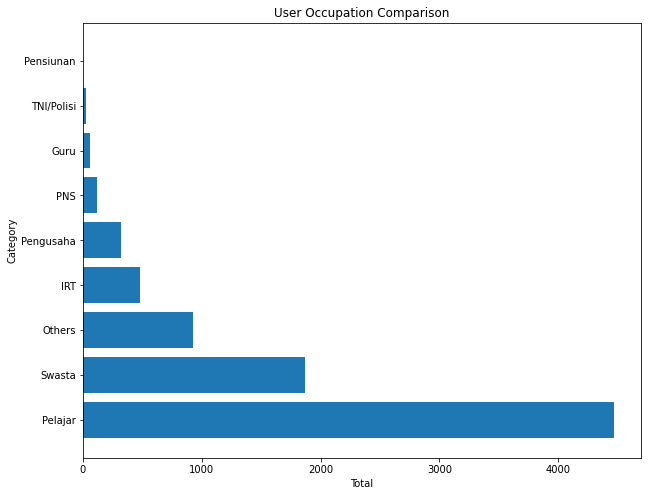

In [ ]:
# 4TH EDA (User Occupation)

df_active['user_occupation'].value_counts()

# Di dominasi oleh Pelajar, disusul oleh Swasta dan Others.

categories = ['Pelajar', 'Swasta', 'Others', 'IRT', 'Pengusaha', 'PNS', 'Guru', 'TNI/Polisi', 'Pensiunan']
values = [4473, 1868, 928, 478, 324, 116, 60, 26, 4]

# Create histogram
plt.figure(figsize=(10,8))
plt.barh(categories, values)


# Add labels and title
plt.xlabel('Total')
plt.ylabel('Category')
plt.title('User Occupation Comparison')



*   Pelajar is the highest amount of user with total 7887 user, meanwhile Pensiunan has the lowest amount of user with only 5 user.



### User Income Range

In [ ]:
df_active['user_income_range'].value_counts()

< 10 Juta                   3527
Rp 10 Juta - 50 Juta        2706
> Rp 50 Juta - 100 Juta     1343
> Rp 100 Juta - 500 Juta     637
> Rp 500 Juta - 1 Miliar      48
> Rp 1 Miliar                 16
Name: user_income_range, dtype: int64

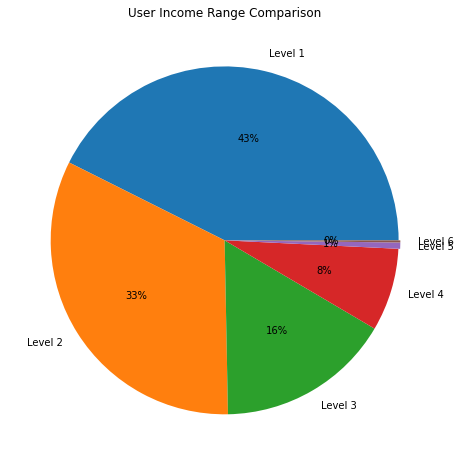

In [ ]:
# 5TH EDA USER INCOME CATEGORIZE

df_active['user_income_range'] = df_active['user_income_range'].str.replace('< 10 Juta','Level 1').replace('Rp 10 Juta - 50 Juta','Level 2').replace('> Rp 50 Juta - 100 Juta','Level 3').replace('> Rp 100 Juta - 500 Juta','Level 4').replace('> Rp 500 Juta - 1 Miliar','Level 5').replace('> Rp 1 Miliar','Level 6')
df_active['user_income_range'].value_counts()

#Level0 : < 10Juta
#Level1 : >10 - 50jt
#Level2 : >50 - 100jt
#Level3 : >100 - 500jt
#Level4 : >500jt

df_active['user_income_range'].value_counts()

data = df_active['user_income_range'].value_counts()
label = ['Level 1','Level 2','Level 3','Level 4','Level 5','Level 6']

plt.figure(figsize=(9,8))
plt.pie(data, labels = label, autopct='%1.0f%%', explode=[0,0,0,0,0.01,0.01], shadow=False, startangle=360)
plt.title('User Income Range Comparison')
plt.show()

<AxesSubplot:xlabel='user_income_range', ylabel='Count'>

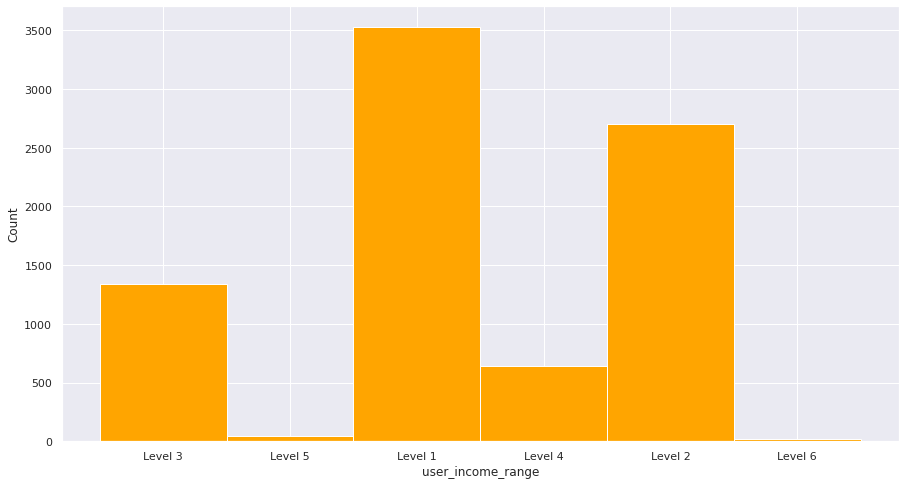

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(data = df_active
            ,x = 'user_income_range'
            ,color = 'orange'
            ,alpha = 1
            ,bins = 3
             )



*  User income are simplified with some categorized (Level 0, Level 1, Level 2, Level 3, Level 4)
*   User Level 1 (<10jt) are the highest amount of total user compared to other with percentage 43% from total user

* User Level 4 (>500jt) has the lowest user, which means there are some of "Crazy rich" invested in our platform



### User Income Source

Text(0.5, 1.0, 'Income Source Comparison')

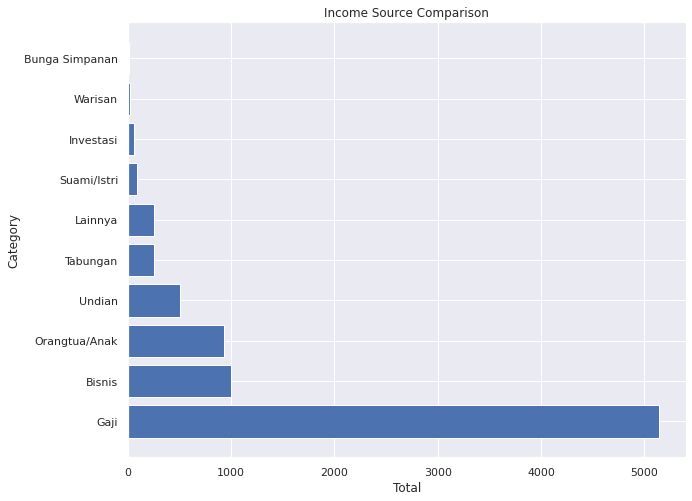

In [ ]:
df_active['user_income_source'].value_counts()

categories = ['Gaji', 'Bisnis', 'Orangtua/Anak', 'Undian', 'Tabungan', 'Lainnya', 'Suami/Istri', 'Investasi', 'Warisan','Bunga Simpanan']
values = [5142, 998, 928, 508, 256, 256, 90, 60, 26, 13]

# Create histogram
plt.figure(figsize=(10,8))
plt.barh(categories, values)


# Add labels and title
plt.xlabel('Total')
plt.ylabel('Category')
plt.title('Income Source Comparison')



*   Most of users invested their money to our platform that comes from their Salary.



### User Referral

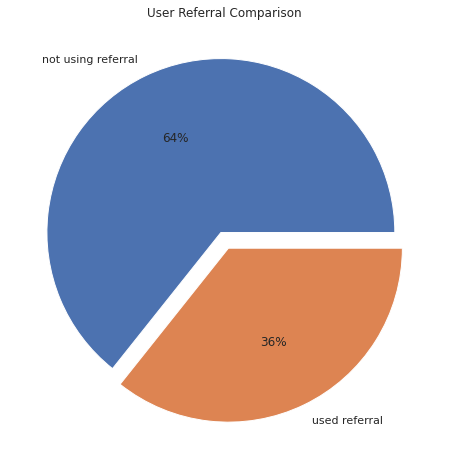

In [ ]:
referral = df_active.groupby('referral_code_used')['user_id'].count()
referral = referral.reset_index()

plt.figure(figsize=(10,8))
plt.pie(referral['user_id'], labels = referral['referral_code_used'], explode=(0.05,0.05), autopct='%1.0f%%')
plt.title('User Referral Comparison')
plt.show()



*   Most of user are not using referral with total percentage 64% and the rest of user used referral with total percentage 36%


## Transactions User Analysis

### Trend of Transacations

#### Trend of Total Transaction

In [ ]:
trend = trans_clean.copy()
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              3471 non-null    float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         4426 non-null    float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   4086 non-null    float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           131 non-null     float64       
 9   sell_campuran_t

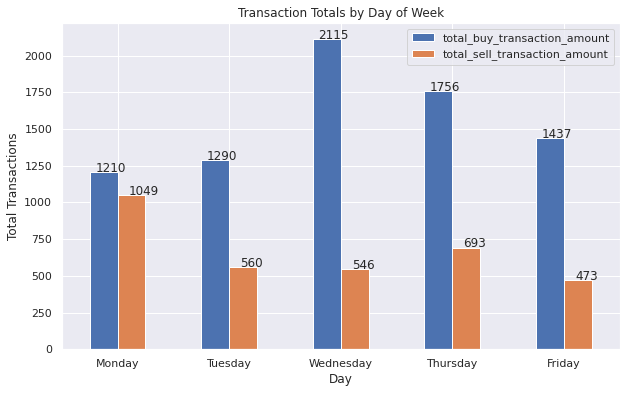

In [ ]:
# Group the data by day of the week and sum the total_buy and total_sell values
day_of_totals = trend.groupby(trend['date'].dt.dayofweek).count()[['total_buy_transaction_amount', 'total_sell_transaction_amount']]

# Define a list of weekday names to use as x-axis labels
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Set the figure size and create the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the weekday totals as a bar chart and show the legend
day_of_totals.plot(kind='bar', ax=ax)

# Set the x-axis tick labels, label the axes, and set the title
ax.set_xticklabels(day_names, rotation=0)
ax.set_xlabel('Day')
ax.set_ylabel('Total Transactions')
ax.set_title('Transaction Totals by Day of Week')
for i, v in enumerate(day_of_totals.values):
    ax.text(i-0.2, v[0]+1, str(v[0]))
    ax.text(i+0.1, v[1]+1, str(v[1]))

# Show the plot
plt.show()

In [ ]:
trend = trend.fillna(0)
trend.head(10)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
1,50701,2021-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
2,50701,2021-09-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
3,50701,2021-09-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
4,50701,2021-09-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
5,50701,2021-09-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
6,50701,2021-09-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
7,50701,2021-09-08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
8,50701,2021-09-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000
9,50701,2021-09-10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"10,000,000.00",10000000


In [ ]:
trend_buy = trend[trend['total_buy_transaction_amount']>0]
trend_buy = trend_buy.groupby(['date'])
trend_buy = trend_buy['user_id'].agg(['count']).reset_index()

trend_sell = trend[trend['total_sell_transaction_amount']<0]
trend_sell = trend_sell.groupby(['date'])
trend_sell = trend_sell['user_id'].agg(['count']).reset_index()


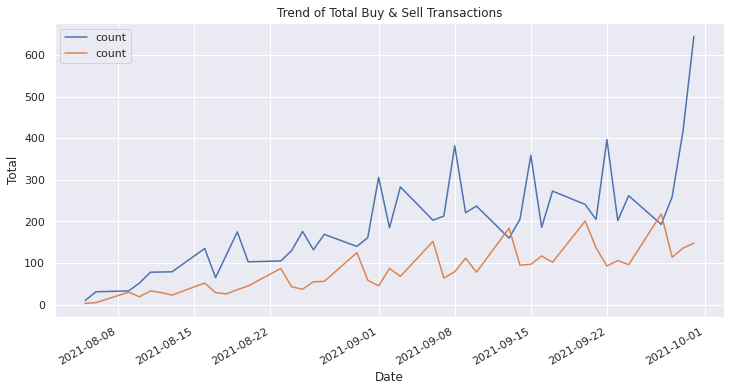

In [ ]:
trend_buy.set_index('date', inplace=False)
trend_sell.set_index('date', inplace=False)

trend_b = trend_buy.groupby('date').mean()
trend_s = trend_sell.groupby('date').mean()

fig, ax = plt.subplots(figsize=(12,6))
trend_b.plot(kind='line',ax=ax)
trend_s.plot(kind='line',ax=ax)
ax.set_title('Trend of Total Buy & Sell Transactions')
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.show()

*   The highest number of buying transaction are occured in Wednesday with total transaction 2115 transactions

*  The highest number of selling transaction are occured in Monday with total transaction 1049 transactions

* The number of buying transactions are increasing from Monday to wednesday, and decreasing from thursday to friday

* The number of buying and selling transactions is fluctuating.

* Trend of total buy and sell transaction has positive trend

#### Trend of Buy Transcation

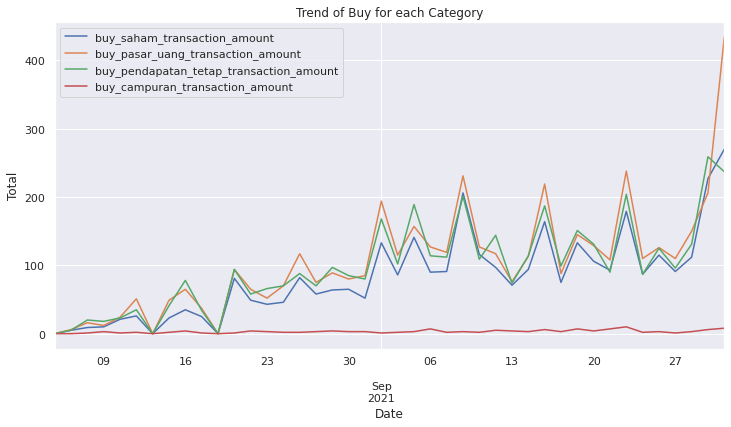

In [ ]:
trend.set_index('date', inplace=False)

trend_buy = trans_clean.groupby('date').count()[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']]

fig, ax = plt.subplots(figsize=(12,6))
trend_buy.plot(kind='line',ax=ax)
ax.set_title('Trend of Buy for each Category')
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.show()

* Total amount of buying transaction for Saham, Pasar Uang, and Pendapatan Tetap are nearly same

* Total amount of buying transaction of Campuran has the lowest amount compared to others

* Trend of buying transaction for Saham, Pasar Uang, and Pendapatan Tetap has positive trend, meanwhile Campuran is stagnant.

* At the end of the month amount of transaction are highly increased for Saham, Pasar Uang and Pendapatan Tetap

#### Trend of Sell Transaction

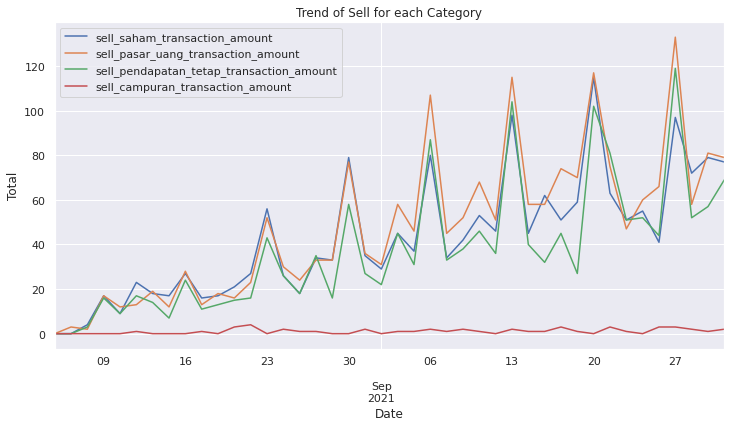

In [ ]:
trend.set_index('date', inplace=False)

trend_sell = trans_clean.groupby('date').count()[['sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount']]

fig, ax = plt.subplots(figsize=(12,6))
trend_sell.plot(kind='line',ax=ax)
ax.set_title('Trend of Sell for each Category')
ax.set_xlabel('Date')
ax.set_ylabel('Total')

plt.show()

* Total amount of selling transaction for Saham, Pasar Uang, and Pendapatan Tetap are nearly same

* Total amount of selling transaction of Campuran has the lowest amount compared to others

* Trend of selling transaction for Saham, Pasar Uang, and Pendapatan Tetap has positive trend but still fluctuating, meanwhile Campuran is stagnant.

* At the end of the month amount of selling transaction are highly increased for Saham, Pasar Uang and Pendapatan Tetap

### Total invested Amount

In [ ]:
total_invested_amount = df_merged['end_month_amount'].sum()
total_invested_amount

21273496501



*   Total invested amount in the end of month (September) around 21,273,496,501 billion



### Total Buy & Sell

#### Overall

In [ ]:
df_active

,user_id,date_register,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_month_amount,total_buy_amount,...,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,age_category
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Level 3,not using referral,Gaji,600000,100000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,000.00",0.00,Adult
1,3802293,2021-08-15 09:31:24,Female,47,PNS,Level 5,used referral,Gaji,13500000,8500000,...,0.00,"850,000.00",0.00,"2,030,000.00",0.00,0.00,0.00,"8,500,000.00",0.00,Adult
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,Level 1,not using referral,Gaji,999000,149000,...,0.00,0.00,0.00,0.00,0.00,"149,000.00",0.00,"149,000.00",0.00,Adult
3,3836491,2021-08-18 11:32:25,Male,59,Others,Level 1,used referral,Lainnya,10000,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Adult
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,Level 3,not using referral,Gaji,110431,1000000,...,"-740,000.00","100,000.00","-200,000.00","530,000.00","-949,569.00",0.00,0.00,"1,000,000.00","-1,889,569.00",Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,Level 4,not using referral,Lainnya,0,350000,...,"-230,000.00","30,000.00","-40,000.00","140,000.00","-180,000.00",0.00,0.00,"350,000.00","-450,000.00",Adult
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Level 2,used referral,Keuntungan Bisnis,0,25000,...,"-50,000.00",0.00,"-10,000.00","25,000.00","-65,000.00",0.00,0.00,"25,000.00","-125,000.00",Adult
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,Level 3,not using referral,Gaji,435000,240000,...,0.00,"105,000.00",0.00,"25,000.00",0.00,0.00,0.00,"240,000.00",0.00,Adult
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,Level 4,not using referral,Gaji,0,150000,...,"-140,000.00","10,000.00","-20,000.00","60,000.00","-90,000.00",0.00,0.00,"150,000.00","-250,000.00",Adult


In [ ]:
total_buy = df_merged['total_buy_amount'].sum()
total_sell = df_merged['total_sell_amount'].sum()
print(total_buy)
print(total_sell)

12398569409
-2425462774




*   Total buy amount from all Category is 12,398,569,409 billion

* Total sell amount from all Category is 2,425,462,774 billion



#### Saham

In [ ]:
buy_saham = df_active['buy_saham_transaction_amount'].sum()  
sell_saham = df_active['sell_saham_transaction_amount'].sum() 
print(buy_saham)
print(sell_saham)
# Total buy for 'Saham' is 1,590,346,630 Billion
# Total sell for 'Saham' is 461,122,026 Million

1590346630.0
-461122026.0



*   Total buy amount for Saham Category is 1,590,346,630 billion

* Total sell amount for Saham Category is 461,122,026 billion


#### Pasar Uang

In [ ]:
buy_pu = df_active['buy_pasar_uang_transaction_amount'].sum()
sell_pu = df_active['sell_pasar_uang_transaction_amount'].sum()
print(buy_pu)
print(sell_pu)
# Total buy for 'Pasar Uang' is 3,725,638,806 Billion
# Total sell for 'Pasar Uang' is 1,016,380,036 Billion

3725638806.0
-1016380036.0



*   Total buy amount for Pasar Uang Category is 3,725,638,806 billion

* Total sell amount for Pasar Uang Category is 1,016,380,036 billion



#### Pendapatan Tetap

In [ ]:
buy_pt = df_active['buy_pendapatan_tetap_transaction_amount'].sum()
sell_pt = df_active['sell_pendapatan_tetap_transaction_amount'].sum()
print(buy_pt)
print(sell_pt)
# Total buy for 'Pendapatan Tetap' is 6,551,156,971 Billion
# Total sell for 'Pendapatan Tetap' is 770,282,648 Million

6551156971.0
-770282648.0


*   Total buy amount for Pendapatan Tetap Category is 6,551,156,971 Billion

* Total sell amount for Pendapat Tetap Category is 770,282,648 Million

#### Campuran

In [ ]:
buy_cm = df_active['buy_campuran_transaction_amount'].sum()
sell_cm = df_active['sell_campuran_transaction_amount'].sum()
print(buy_cm)
print(sell_cm)
# Total buy for 'Campuran' is 531,427,002 Million
# Total sell for 'Campuran' is 177,678,064 Million

531427002.0
-177678064.0


*   Total buy amount for Campuran Category is 531,427,002 Million

* Total sell amount for Campuran Category is 177,678,064 Million

#### Comparison

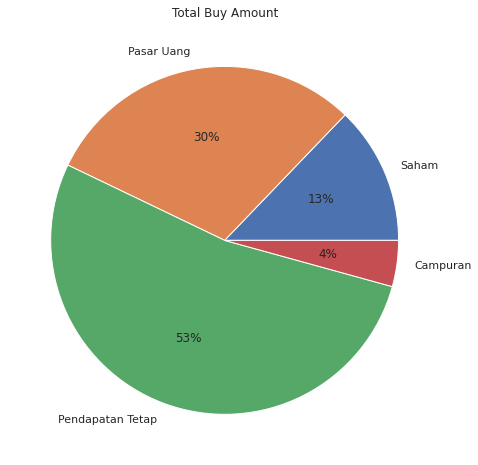

In [ ]:
data = [buy_saham, buy_pu, buy_pt, buy_cm]
label = ['Saham','Pasar Uang','Pendapatan Tetap','Campuran']

plt.figure(figsize=(9,8))
plt.pie(data, labels = label, autopct='%1.0f%%', explode=[0,0,0,0], shadow=False, startangle=360)
plt.title('Total Buy Amount')
plt.show()



*   Pendapatan Tetap category has the highest amount of buying trasaction with total percentage 53%, meanwhile Campuran category has the lowest amount of buying transaction with only percentage 4%



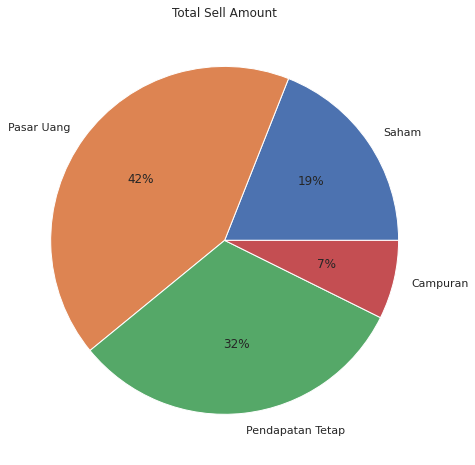

In [ ]:
data = [sell_saham, sell_pu, sell_pt, sell_cm]

for i in range(len(data)):
    if data[i] < 0:
        data[i] = abs(data[i])

label = ['Saham','Pasar Uang','Pendapatan Tetap','Campuran']

plt.figure(figsize=(9,8))
plt.pie(data, labels = label, autopct='%1.0f%%', explode=[0,0,0,0], shadow=False, startangle=360)
plt.title('Total Sell Amount')
plt.show()

*   Pasar Uang category has the highest amount of selling trasaction with total percentage 42%, meanwhile Campuran category has the lowest amount of selling transaction with only percentage 7%

## Segmentation

### Data preparation

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs    

In [ ]:
df_seg = df_active.copy()
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date_register                             8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   object        
 3   user_age                                  8277 non-null   int64         
 4   user_occupation                           8277 non-null   object        
 5   user_income_range                         8277 non-null   object        
 6   referral_code_used                        8277 non-null   object        
 7   user_income_source                        8277 non-null   object        
 8   end_month_amount                          8277 non-null   int64         
 9   total_buy_amount              


Here we want to create our cluster using these feature :
* User Age
* User Gender
* User Occupation
* User Income range
* User referral
* User Income Source


In [ ]:
# Remove 'user_gender','user_occupation','user_income_range','referral_code_used','user_income_source' because we have categorical columns of each value 
df_seg = df_seg.drop(['date_register','total_buy_amount','total_sell_amount','buy_saham_transaction_amount','sell_saham_transaction_amount','buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount','total_sell_transaction_amount','buy_pendapatan_tetap_transaction_amount','age_category','end_month_amount'],axis=1,inplace=False)

In [ ]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       8277 non-null   object 
 1   user_gender                   8277 non-null   object 
 2   user_age                      8277 non-null   int64  
 3   user_occupation               8277 non-null   object 
 4   user_income_range             8277 non-null   object 
 5   referral_code_used            8277 non-null   object 
 6   user_income_source            8277 non-null   object 
 7   total_buy_transaction_amount  8277 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 582.0+ KB


### Check correlations

In [ ]:
df_corr = df_seg.copy()

In [ ]:
df_corr['user_gender'] = df_corr['user_gender'].astype('category')
df_corr['user_gender'] = df_corr['user_gender'].cat.codes

In [ ]:
# cat.code referral
df_corr['user_age'] = df_corr['user_age'].astype('category')
df_corr['user_age'] = df_corr['user_age'].cat.codes

In [ ]:
# cat.code referral
df_corr['referral_code_used'] = df_corr['referral_code_used'].astype('category')
df_corr['referral_code_used'] = df_corr['referral_code_used'].cat.codes

In [ ]:
df_corr['user_occupation'] = df_corr['user_occupation'].astype('category')
df_corr['user_occupation'] = df_corr['user_occupation'].cat.codes

In [ ]:
# cat.code income source
df_corr['user_income_source'] = df_corr['user_income_source'].astype('category')
df_corr['user_income_source'] = df_corr['user_income_source'].cat.codes

In [ ]:
# cat.code income range
df_corr['user_income_range'] = df_corr['user_income_range'].astype('category')
df_corr['user_income_range'] = df_corr['user_income_range'].cat.codes

<AxesSubplot:>

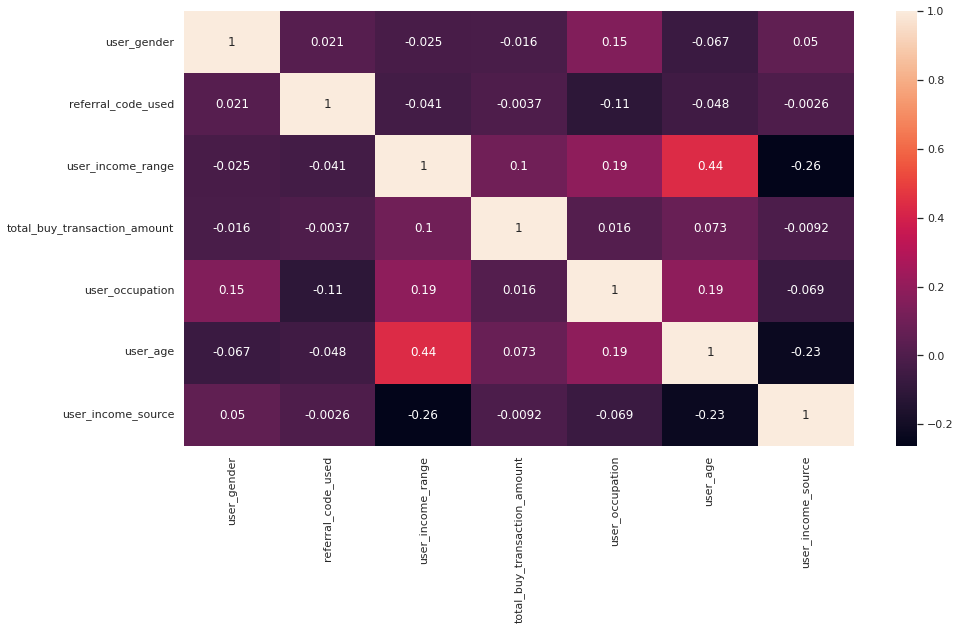

In [ ]:
data = {'total_buy_transaction_amount',
        'user_age',
        'user_gender',
        'referral_code_used',
        'user_income_range',
        'user_income_source',
        'user_occupation'}

df = pd.DataFrame(data)

corr_matrix = df_corr[data].corr()

sns.heatmap(corr_matrix, annot=True)

Checking correlation value between all variable to make sure there is no more than 2 or more variable that has strong correlation

## Data Scaling

In [ ]:
df_scale = df_corr.copy()
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       8277 non-null   object 
 1   user_gender                   8277 non-null   int8   
 2   user_age                      8277 non-null   int8   
 3   user_occupation               8277 non-null   int8   
 4   user_income_range             8277 non-null   int8   
 5   referral_code_used            8277 non-null   int8   
 6   user_income_source            8277 non-null   int8   
 7   total_buy_transaction_amount  8277 non-null   float64
dtypes: float64(1), int8(6), object(1)
memory usage: 500.5+ KB


In [ ]:
# Dropping columns that has object/string data type, 
#df_scale = df_scale.drop(['user_gender','user_occupation','user_income_range','referral_code_used','user_income_source'], axis = 1, inplace=False)

In [ ]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       8277 non-null   object 
 1   user_gender                   8277 non-null   int8   
 2   user_age                      8277 non-null   int8   
 3   user_occupation               8277 non-null   int8   
 4   user_income_range             8277 non-null   int8   
 5   referral_code_used            8277 non-null   int8   
 6   user_income_source            8277 non-null   int8   
 7   total_buy_transaction_amount  8277 non-null   float64
dtypes: float64(1), int8(6), object(1)
memory usage: 500.5+ KB


### No scale

<AxesSubplot:xlabel='user_age', ylabel='total_buy_transaction_amount'>

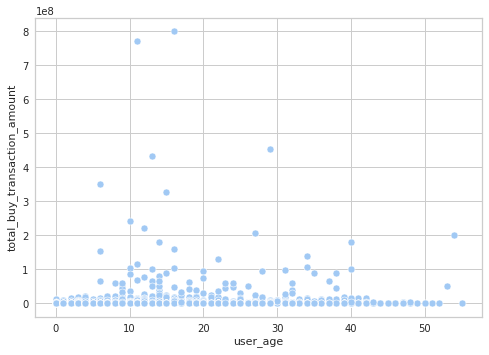

In [ ]:
sns.scatterplot(data = df_scale, x='user_age', y='total_buy_transaction_amount')

### Standard scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_scale.copy()
column = ['user_age','total_buy_transaction_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<AxesSubplot:xlabel='user_age', ylabel='total_buy_transaction_amount'>

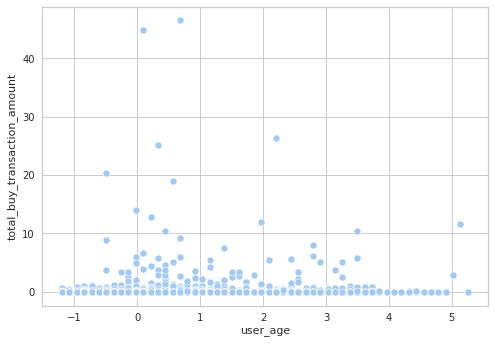

In [ ]:
sns.scatterplot (data = ss_scale_df, x='user_age', y='total_buy_transaction_amount')

In [ ]:
ss_scale_df[['user_age', 'total_buy_transaction_amount']].head()

,user_age,total_buy_transaction_amount
0,3.03,-0.08
1,2.32,0.41
2,3.03,-0.08
3,3.73,-0.09
4,3.49,-0.03


### Robust Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_scale.copy()
column = df_scale.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['user_age', 'total_buy_transaction_amount']] = rs_scaler.fit_transform(rs_scale_df[['user_age', 'total_buy_transaction_amount']])

<AxesSubplot:xlabel='user_age', ylabel='total_buy_transaction_amount'>

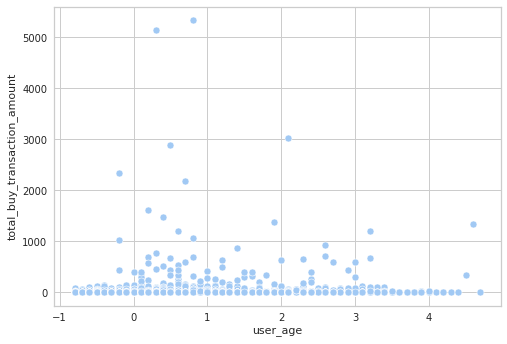

In [ ]:
sns.scatterplot (data = rs_scale_df, x='user_age', y='total_buy_transaction_amount')

### MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_scale.copy()
column = df_scale.columns.to_list()
# using Minmax Scalerbuy_pendapatan_tetap_transaction_amount
mm_scaler = MinMaxScaler()
mm_scale_df[['user_age', 'total_buy_transaction_amount']] = mm_scaler.fit_transform(mm_scale_df[['user_age', 'total_buy_transaction_amount']])

<AxesSubplot:xlabel='user_age', ylabel='total_buy_transaction_amount'>

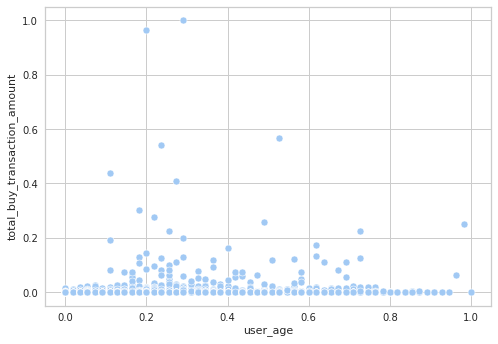

In [ ]:
sns.scatterplot (data = mm_scale_df, x='user_age', y='total_buy_transaction_amount')

## Clustering

In [ ]:
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs   

### Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

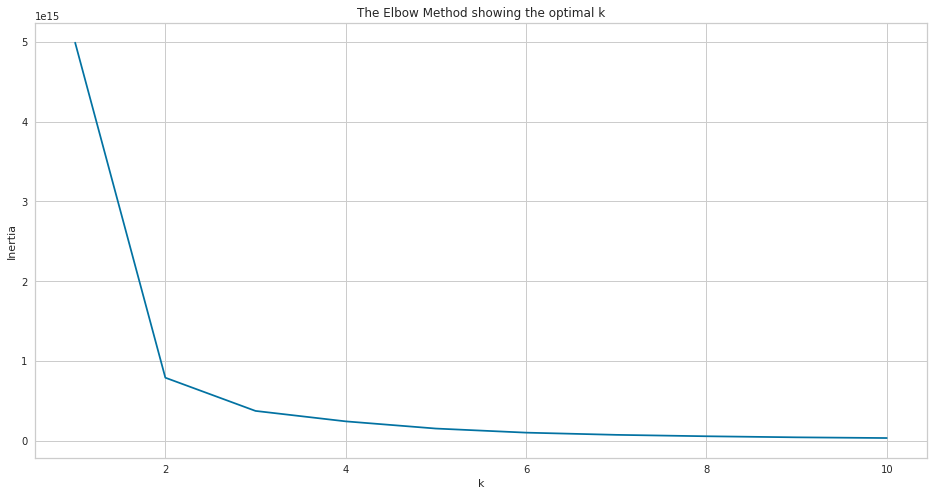

[4987185575174372.0, 793572714715342.5, 377674839099385.1, 247073167038635.9, 157093065613590.62, 105814448050402.97, 78217486550207.23, 60518710233269.12, 47142314722028.78, 38330506647482.0]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(mm_scale_df)  
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6664047606504937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5970137488756173


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.577634224294559


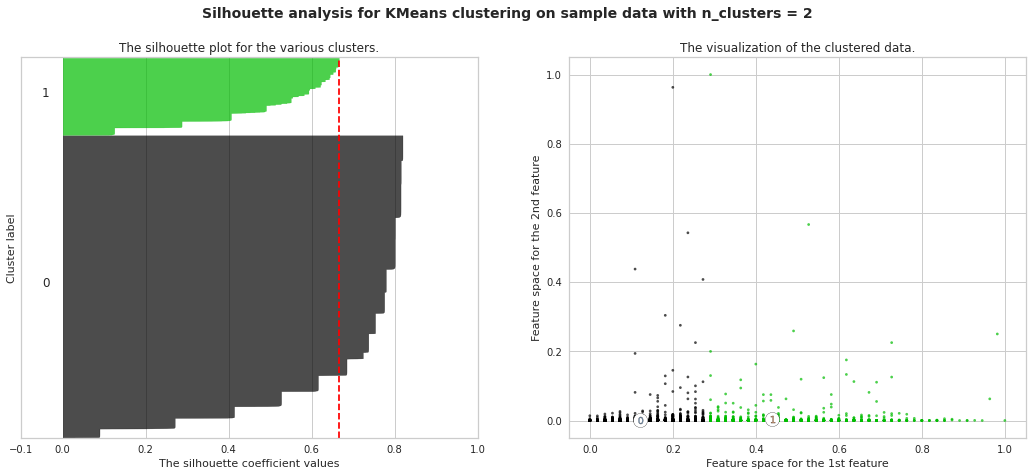

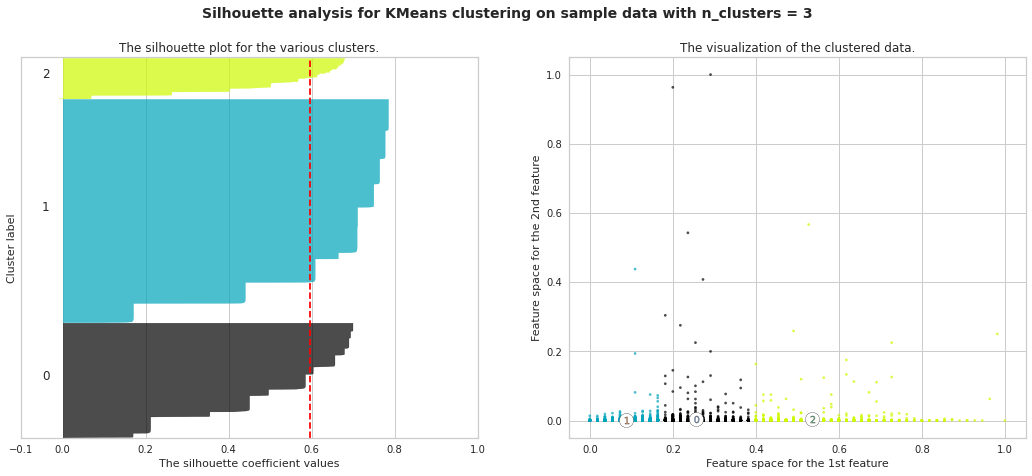

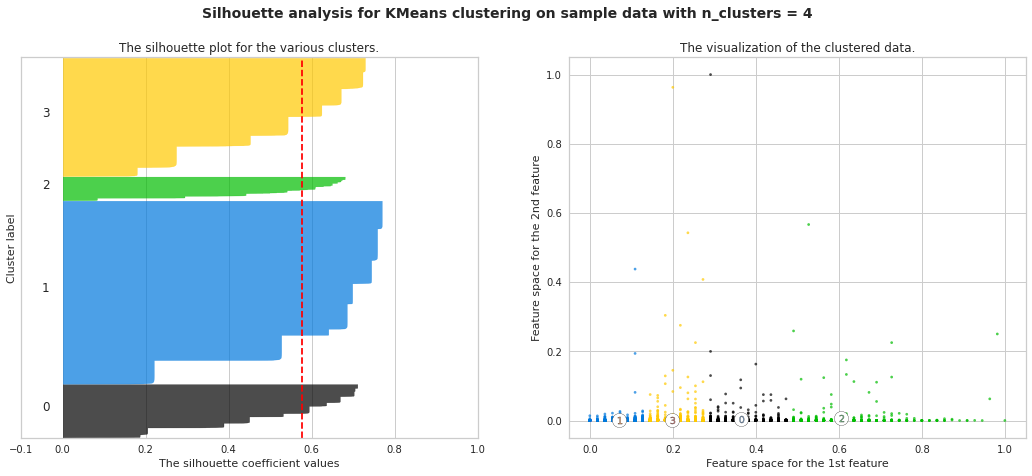

In [ ]:
silhoutte_analysis(mm_scale_df[['user_age', 'total_buy_transaction_amount']],list(range(2,5)))

### Interpret Clustering

In [ ]:
# make cluster
Cluster_3 = mm_scale_df.copy()

cluster_model = KMeans(n_clusters=3) 
cluster_model.fit_predict(Cluster_3[['user_age', 'total_buy_transaction_amount']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_transaction_amount,cluster
0,3816789,0,0.65,1,2,0,3,0.00,2
1,3802293,0,0.55,3,4,1,3,0.01,2
2,3049927,1,0.65,7,0,0,3,0.00,2
3,3836491,1,0.76,2,0,1,6,0.00,2
4,3783302,1,0.73,7,2,0,3,0.00,2


<AxesSubplot:xlabel='cluster', ylabel='total_buy_transaction_amount'>

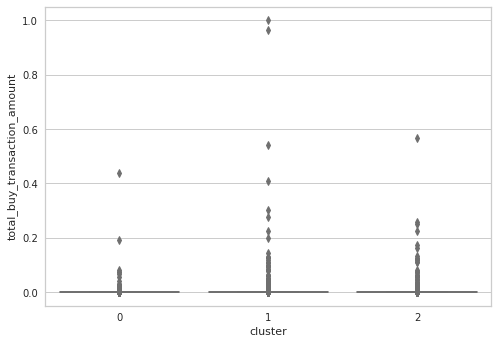

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='total_buy_transaction_amount')

### Merge Cluster with dataset

In [ ]:
df_segmented = Cluster_3.merge(df_seg,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_gender_x,user_age_x,user_occupation_x,user_income_range_x,referral_code_used_x,user_income_source_x,total_buy_transaction_amount_x,cluster,user_gender_y,user_age_y,user_occupation_y,user_income_range_y,referral_code_used_y,user_income_source_y,total_buy_transaction_amount_y
0,3816789,0,0.65,1,2,0,3,0.00,2,Female,53,IRT,Level 3,not using referral,Gaji,"100,000.00"
1,3802293,0,0.55,3,4,1,3,0.01,2,Female,47,PNS,Level 5,used referral,Gaji,"8,500,000.00"
2,3049927,1,0.65,7,0,0,3,0.00,2,Male,53,Swasta,Level 1,not using referral,Gaji,"149,000.00"
3,3836491,1,0.76,2,0,1,6,0.00,2,Male,59,Others,Level 1,used referral,Lainnya,0.00
4,3783302,1,0.73,7,2,0,3,0.00,2,Male,57,Swasta,Level 3,not using referral,Gaji,"1,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,1,0.58,7,3,0,6,0.00,2,Male,49,Swasta,Level 4,not using referral,Lainnya,"350,000.00"
8273,3798265,0,0.58,1,1,1,5,0.00,2,Female,49,IRT,Level 2,used referral,Keuntungan Bisnis,"25,000.00"
8274,3670811,1,0.58,7,2,0,3,0.00,2,Male,49,Swasta,Level 3,not using referral,Gaji,"240,000.00"
8275,3812221,1,0.58,3,3,0,3,0.00,2,Male,49,PNS,Level 4,not using referral,Gaji,"150,000.00"


### Visualize Cluster

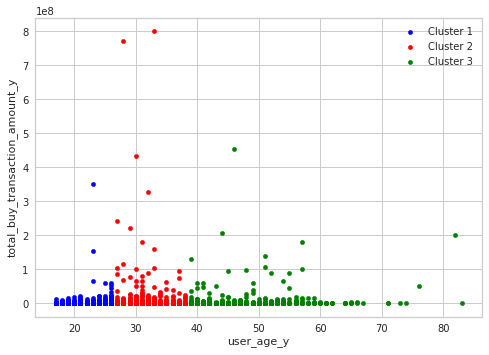

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='user_age_y', y='total_buy_transaction_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='user_age_y', y='total_buy_transaction_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='user_age_y', y='total_buy_transaction_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)

### Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y','total_buy_transaction_amount_y']].agg(['count','mean','min','max','median']).T


cluster                                            0              1  \
user_age_y                     count        4,881.00       2,507.00   
                               mean            21.75          31.04   
                               min             17.00          27.00   
                               max             26.00          38.00   
                               median          22.00          30.00   
total_buy_transaction_amount_y count        4,881.00       2,507.00   
                               mean       499,356.94   2,645,542.14   
                               min              0.00           0.00   
                               max    350,000,000.00 799,500,000.00   
                               median           0.00           0.00   

cluster                                            2  
user_age_y                     count          889.00  
                               mean            46.45  
                               min             39.00  
                               max             83.00  
                               median          45.00  
total_buy_transaction_amount_y count          889.00  
                               mean     3,744,470.22  
                               min              0.00  
                               max    452,950,000.00  
                               median      10,000.00

## Cluster Interpretation

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_gender_x,user_age_x,user_occupation_x,user_income_range_x,referral_code_used_x,user_income_source_x,total_buy_transaction_amount_x,cluster,user_gender_y,user_age_y,user_occupation_y,user_income_range_y,referral_code_used_y,user_income_source_y,total_buy_transaction_amount_y
0,3816789,0,0.65,1,2,0,3,0.00,2,Female,53,IRT,Level 3,not using referral,Gaji,"100,000.00"
1,3802293,0,0.55,3,4,1,3,0.01,2,Female,47,PNS,Level 5,used referral,Gaji,"8,500,000.00"
2,3049927,1,0.65,7,0,0,3,0.00,2,Male,53,Swasta,Level 1,not using referral,Gaji,"149,000.00"
3,3836491,1,0.76,2,0,1,6,0.00,2,Male,59,Others,Level 1,used referral,Lainnya,0.00
4,3783302,1,0.73,7,2,0,3,0.00,2,Male,57,Swasta,Level 3,not using referral,Gaji,"1,000,000.00"


In [ ]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         8277 non-null   object 
 1   user_gender_x                   8277 non-null   int8   
 2   user_age_x                      8277 non-null   float64
 3   user_occupation_x               8277 non-null   int8   
 4   user_income_range_x             8277 non-null   int8   
 5   referral_code_used_x            8277 non-null   int8   
 6   user_income_source_x            8277 non-null   int8   
 7   total_buy_transaction_amount_x  8277 non-null   float64
 8   cluster                         8277 non-null   int32  
 9   user_gender_y                   8277 non-null   object 
 10  user_age_y                      8277 non-null   int64  
 11  user_occupation_y               8277 non-null   object 
 12  user_income_range_y             82

Things can be analyzed :
* User Age
* End month amount
* Total buy transaction amount
* User Gender
* User Occupation
* User Income range and Source

### User Age

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['user_age_y'].agg(['count','mean','max','min'])

,count,mean,max,min
cluster,,,,
0,4881,21.75,26,17
1,2507,31.04,38,27
2,889,46.45,83,39


### Total buy Transaction Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['total_buy_transaction_amount_y'].agg(['count','mean','max','min'])

,count,mean,max,min
cluster,,,,
0,4881,"499,356.94","350,000,000.00",0.00
1,2507,"2,645,542.14","799,500,000.00",0.00
2,889,"3,744,470.22","452,950,000.00",0.00


### User Gender

In [ ]:
df_segmented.groupby(['cluster'])['user_gender_y'].describe()

,count,unique,top,freq
cluster,,,,
0,4881,2,Male,3131
1,2507,2,Male,1547
2,889,2,Male,498


### Use Occupation

In [ ]:
df_segmented.groupby(['cluster'])['user_occupation_y'].describe()

,count,unique,top,freq
cluster,,,,
0,4881,8,Pelajar,3887
1,2507,8,Swasta,1112
2,889,9,Swasta,447


### User Income Range

In [ ]:
df_segmented.groupby(['cluster'])['user_income_range_y'].describe()

,count,unique,top,freq
cluster,,,,
0,4881,6,Level 1,2813
1,2507,6,Level 2,936
2,889,6,Level 2,264


### User Income Source

In [ ]:
df_segmented.groupby(['cluster'])['user_income_source_y'].describe()

,count,unique,top,freq
cluster,,,,
0,4881,10,Gaji,2733
1,2507,10,Gaji,1858
2,889,10,Gaji,551


In [ ]:
df_segmented.groupby(['cluster'])['referral_code_used_y'].describe()

,count,unique,top,freq
cluster,,,,
0,4881,2,not using referral,3050
1,2507,2,not using referral,1652
2,889,2,not using referral,620


## Clustering Name & Comparison

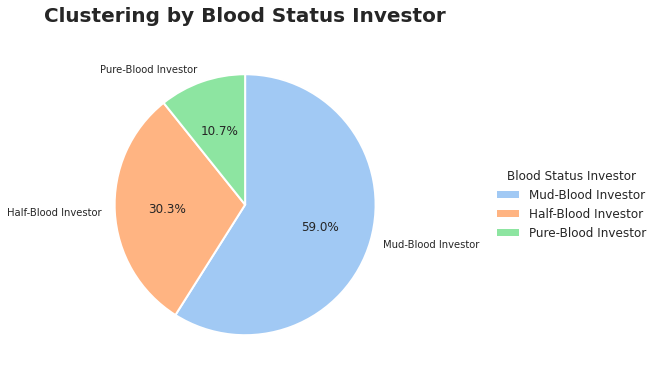

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories and their values
categories = ['Mud-Blood Investor', 'Half-Blood Investor', 'Pure-Blood Investor']
values = [4881, 2507, 889]

# Create a pie chart using seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Customize the chart
plt.title("Clustering by Blood Status Investor", fontsize=20, fontweight='bold', pad=20)
plt.legend(title='Blood Status Investor', loc="center", bbox_to_anchor=(1.5, 0.5), fontsize=12)

# Display the chart
plt.show()
